# Mapa Logístico
O [mapa logístico](https://en.wikipedia.org/wiki/Logistic_map) é um mapa polinomial de grau 2 que ficou famoso como modelo demográfico, devido ao seu comportamento caótico.
$$x_{n+1}=rx_{n}\left(1-x_{n}\right)$$

In [11]:
import math
import numpy as np
from PIL import Image, ImageDraw
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import clear_output
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Parâmetros
xa = 2.9
xb = 4.0
maxit = 1000

A função abaixo cria o gráfico de maneira não usual. Maniplulando os píxeis de uma imagem diretamente. Experimente com os controles interativos para explorar a sensibilidade da dinâmica ao parâmetro $r$.

### Exercício:
Replique a figura interativa acima usando o matplotlib, e compare a performance das duas implementações. 

In [13]:
%%time
@interact(x0=(0,1,0.1), r=(0,4,0.05), steps=(maxit,maxit,1))
def logistic_fun(x0=0.5, r=2.9, steps=maxit,d=widgets.ToggleButton(value=True, description='linhas', icon='check')):
    x = x0
    alt = 500 # Altura do gráfico
    image = Image.new("RGB", (steps+1, alt+100))
    draw = ImageDraw.Draw(image)
    for j in range(1,steps):
        x = r * x * (1 - x)
        if d:
            image.putpixel((j-1,int(x0*alt)), (255,255,255))
            draw.line((j-1, x0*alt, j, int(x*alt)), fill=128, width=1)
        image.putpixel((j,int(x*alt)), (255,255,255))   
        x0 = x # atualiza o ponto anterior
    display(image)

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0), FloatSlider(value=2.9, description='r…

Wall time: 46.7 ms


In [14]:
%%time
@interact(x0=(0,1,0.1), r=(0,4,0.05), steps=(int(maxit/10),maxit,1))

def logis(x0=0.5, r=2.9, steps=maxit,d=widgets.ToggleButton(value=True, description='linhas', icon='check')):
    x = x0
    X = [x0]
    alt = 500
    n = np.linspace(1,steps, steps)
    for i in range(1,steps):
        x = r * x * (1-x)
        X.append( x )
    if d:
        X = [int(x*500) for x in X]
        plt.figure(figsize=(40,20))
        plt.plot(n,X,color='black', marker='o')
        plt.show()

interactive(children=(FloatSlider(value=0.5, description='x0', max=1.0), FloatSlider(value=2.9, description='r…

Wall time: 1.16 s


## Diagrama de bifurcação
A dinâmica do mapa logístico pode ser melhor explorada através de um diagrama de bifurcação. Como pode ser visto na figura abaixo.

In [5]:
def draw_bif(dimx=1000, dimy=500):
    imgx = dimx
    imgy = dimy
    image = Image.new("RGB", (imgx, imgy))
    for i in range(imgx):
        r = xa + (xb - xa) * float(i) / (imgx - 1)
        x = 0.5
        for j in range(maxit):
            x = r * x * (1 - x)
            if j > maxit / 2:
                image.putpixel((i, int(x * imgy)), (255, 255, 255))
    return image

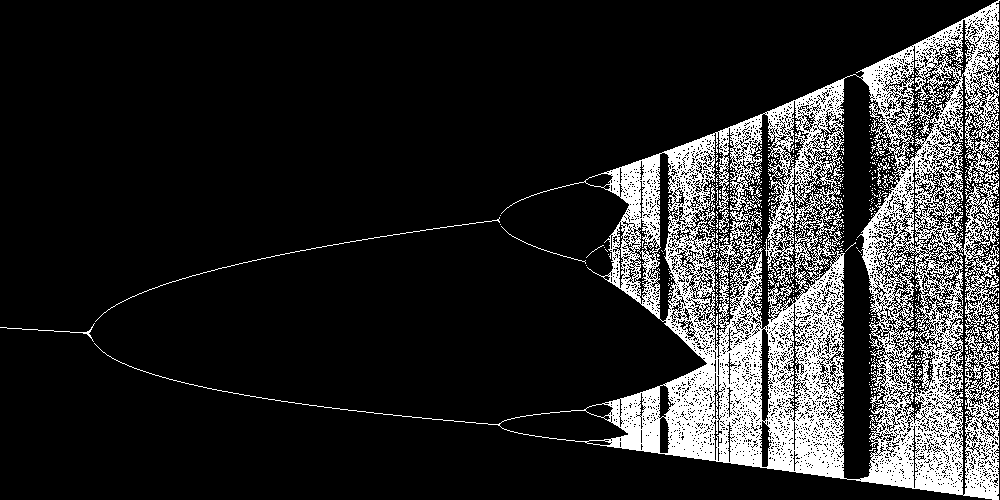

In [6]:
image = draw_bif()
display(image)

### Exercício:
Modifique a figura acima para colorir os ponto diferentemente nos intervalos de $r$ onde o valor de $x$ oscila entre 1, 2, 4, 8, 16 ou mais valores. 

In [110]:
def draw_bif_color(dimx=1000, dimy=500):
    imgx = dimx
    imgy = dimy
    image = Image.new("RGB", (imgx, imgy))
    for i in range(imgx):
        r = xa + (xb - xa) * float(i) / (imgx - 1)
        x = 0.5
        X = []
        for j in range(maxit):
            x = r * x * (1 - x)
            if j > maxit / 2:
                if len(set(X)) < 20 :
                    image.putpixel((i, int(x * imgy)), (200, 0, 200))
                else:
                    image.putpixel((i, int(x * imgy)), (255, 255, 255))
            X.append(int(x*imgy))
    return image

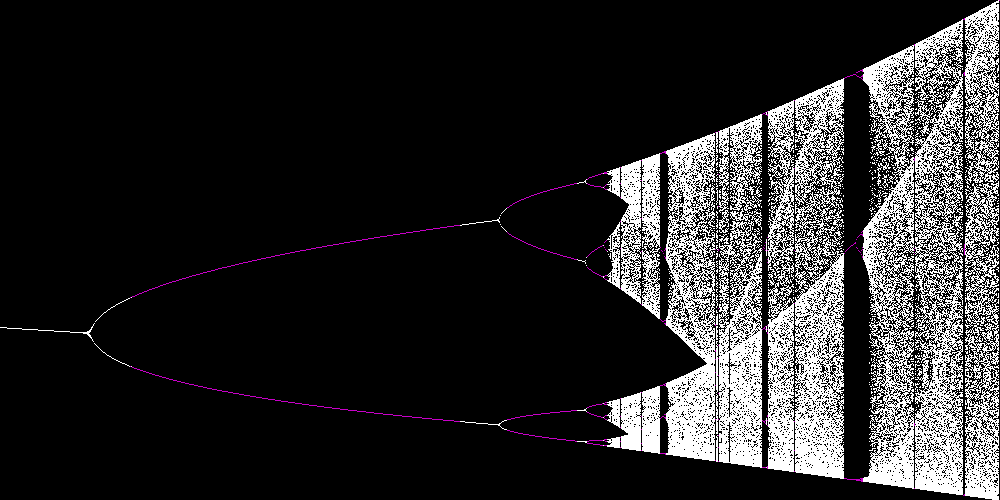

In [111]:
image = draw_bif_color()
display(image)

### Exercício
O mapa logísgico apresenta uma solução exata quando $r=4.0$: $x_{n}=\sin ^{2}\left(2^{n}\theta \pi \right)$.  
crie um gráfico desta solução:

In [47]:
%%time
@interact(x0=(0,1,0.1), r=(4,4,0.05), steps=(int(maxit/10),int(maxit/10),1))

def logis(x0, r, steps=maxit,d=widgets.ToggleButton(value=True, description='linhas', icon='check')):
    x = x0
    X = [x0]
    alt = 500
    n = np.linspace(1,steps, steps)
    for i in range(1,steps):
        x = 4*np.sin((2**x)*np.pi)*(1-np.sin((2**x)*np.pi))
        X.append( x )
    if d:
        X = [int(x*500) for x in X]
        plt.figure(figsize=(70,40))
        plt.plot(n,X,color='black', marker='o')
        plt.show()

interactive(children=(FloatSlider(value=0.0, description='x0', max=1.0), FloatSlider(value=4.0, description='r…

Wall time: 1.38 s
